In [1]:
%pip install fastbook

Note: you may need to restart the kernel to use updated packages.


In [2]:
from fastbook import *
from fastcore.all import *

In [5]:
path = 'satellite_data'

In [6]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=10),
    get_y = parent_label,
    item_tfms=[Resize(256, method='crop')]
).dataloaders(path, bs=32)

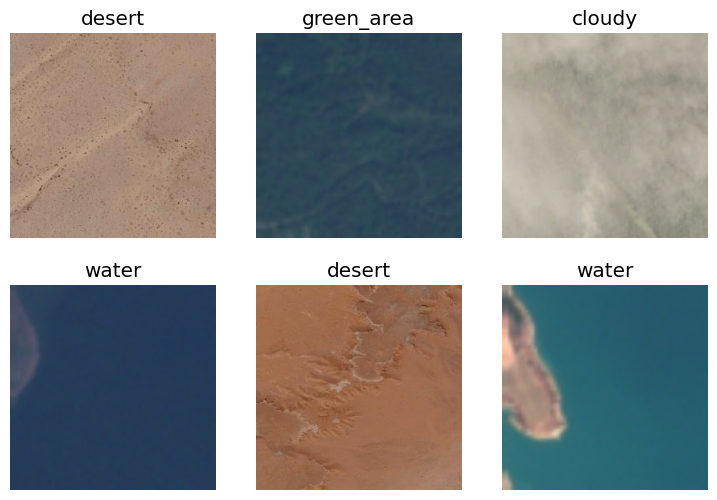

In [ ]:
dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.157936,0.025362,0.991119,00:51


epoch,train_loss,valid_loss,accuracy,time
0,0.042557,0.005081,0.999112,00:40


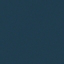

In [ ]:
test_image = Image.open(f'{path}\water\SeaLake_35.jpg').to_thumb(256, 256)
test_image

In [ ]:
label, _, probs = learn.predict(test_image)

print(label, _, probs)

water tensor(3) tensor([6.0719e-07, 6.4790e-06, 1.0627e-04, 9.9989e-01])


In [ ]:
print(f"Confidence in this image being a {label}: {probs.max() * 100}%")

Confidence in this image being a water: 99.98866271972656%
